In [90]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [91]:
digitos=load_digits()#cargamos el conjunto de datos
print(digitos)#imprimirmos lo que tiene

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

<Figure size 432x288 with 0 Axes>

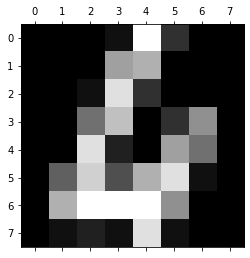

In [92]:
plt.gray() #mostramos un valor 
plt.matshow(digitos.images[1311]) 
plt.show()

In [93]:
print("la longitud de los feature names: ",len(digitos.feature_names))
print(digitos.feature_names)

la longitud de los feature names:  64
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [94]:
df=pd.DataFrame(columns=digitos.feature_names,data=digitos.data)#creo dataframe con columna los nombres y de datos los digitos
print(df)


      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0           0.0        0.0      

In [95]:
df.insert(loc=len(digitos.feature_names),column='digito',value=digitos.target)
#loc para insertar al final, column nombre de la columna y valores de los digitos
print(df)

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0           0.0        0.0      

In [96]:
"""
diagrama de barras. 5 mejor,8 puede
a minimo que tenga que no sea 0, se pone 1
apriori: muestra 177. 888 si y 222 no. se conoce antes
aposteriori: cuando se aplica clasificador. 333 si y 444 no piensa
para minmaxscaler hay que juntar conjunto de entrenamiento y test
train_test_split? para ayuda
ramdom state no inicializar
dos bucles anidades: kvecinos y hold out. primero hold out y despues variando vecinos
diagrama de barras media todos los hold out para cada k
"""

'\ndiagrama de barras. 5 mejor,8 puede\na minimo que tenga que no sea 0, se pone 1\napriori: muestra 177. 888 si y 222 no. se conoce antes\naposteriori: cuando se aplica clasificador. 333 si y 444 no piensa\npara minmaxscaler hay que juntar conjunto de entrenamiento y test\ntrain_test_split? para ayuda\nramdom state no inicializar\ndos bucles anidades: kvecinos y hold out. primero hold out y despues variando vecinos\ndiagrama de barras media todos los hold out para cada k\n'

In [97]:
escala=MinMaxScaler()
x=escala.fit_transform(digitos.data)
print(x)
#escalamos los datos

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]


In [98]:
y=digitos.target#cogemos la clase

In [99]:
import warnings
warnings.filterwarnings('ignore')#para filtrar avisos

In [100]:
accuracy=np.zeros((10,15),dtype=float)#creamos array de ceros con forma de 10 filas y 15 cols como floats
for h in range(10):#bucle de los 10 hold out
	X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,stratify=y)#entreno el modelo, tamano 33 y stratificado
	for k in range(1,16):#para recorrer los vecinos
		clf=KNeighborsClassifier(n_neighbors=k,algorithm='brute')#creo el clasificador con k vecinos, y algoritmo burto
		clf.fit(X_train,y_train)#ajustamos el clasificador
		accuracy[h,k-1]=clf.score(X_test,y_test)#pongo el matriz posicion fila hold out y columna vecino la puntuaciondel test obtenido

In [101]:
aciertos=np.mean(accuracy,axis=0)#hago medias con el array accuracy, axis 0 en la columna y axis 1 en la fila
print("forma del array: ",aciertos.shape)
print(aciertos)

forma del array:  (15,)
[0.98585859 0.98350168 0.98535354 0.98282828 0.98299663 0.98013468
 0.98063973 0.97895623 0.97794613 0.97693603 0.97626263 0.97508418
 0.97390572 0.97356902 0.97188552]


Text(0, 0.5, 'tasa de acierto')

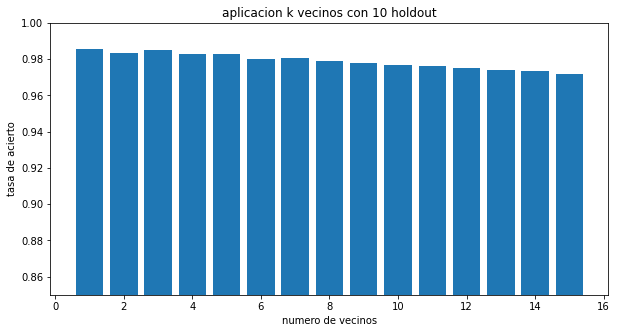

In [102]:
fig,ax=plt.subplots(figsize=(10,5))#creo el diagrama con tamano 10,5
ax.bar(x=np.arange(1,16),height=aciertos)#en eje x recorro de 1 a 16 y de altura pongo lo de aciertos
ax.set_title("aplicacion k vecinos con 10 holdout")
ax.set_ylim(0.85,1)#limito entre 0,85 y 1 lo que se muestra
ax.set_xlabel("numero de vecinos")
ax.set_ylabel("tasa de acierto")

In [103]:
print(type(digitos.data))#tipo de los datos del digitos

<class 'numpy.ndarray'>


In [104]:
datos=digitos.data#cogemos solo los datos

In [105]:
for fila in range(len(datos)):#recorro las filas del array
    for columna in range(len(datos[0])):#recorro las columna del array
        if(datos[fila,columna]>0):#si ese valor es mayor que 0
                datos[fila,columna]=1#pongo un 1

print("el array transformado es ",datos)
        


el array transformado es  [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 ...
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


In [106]:
print("por ejemplo la fila 34: ",datos[34])
print("por ejemplo la fila 785: ",datos[785])
print("por ejemplo la fila 1078: ",datos[1078])

por ejemplo la fila 34:  [0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
por ejemplo la fila 785:  [0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
por ejemplo la fila 1078:  [0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.]


In [107]:
x=datos#guardamos los valores de x e y
y=digitos.target#cogemos la clase

In [108]:
accuracy=np.zeros((10,15),dtype=float)#creamos array de ceros con forma de 10 filas y 15 cols como floats
for h in range(10):#bucle de los 10 hold out
	X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,stratify=y)#entreno el modelo, tamano 33 y stratificado
	for k in range(1,16):#para recorrer los vecinos
		clf=KNeighborsClassifier(n_neighbors=k,algorithm='brute')#creo el clasificador con k vecinos, y algoritmo burto
		clf.fit(X_train,y_train)#ajustamos el clasificador
		accuracy[h,k-1]=clf.score(X_test,y_test)#pongo el matriz posicion fila hold out y columna vecino la puntuaciondel test obtenido

In [109]:
aciertosBits=np.mean(accuracy,axis=0)#hago medias con el array accuracy, axis 0 en la columna y axis 1 en la fila
print("forma del array: ",aciertosBits.shape)
print(aciertosBits)

forma del array:  (15,)
[0.88535354 0.87457912 0.89511785 0.89579125 0.89814815 0.90084175
 0.9003367  0.90252525 0.9010101  0.90016835 0.9003367  0.89882155
 0.8989899  0.8996633  0.8983165 ]


Text(0, 0.5, 'tasa de acierto')

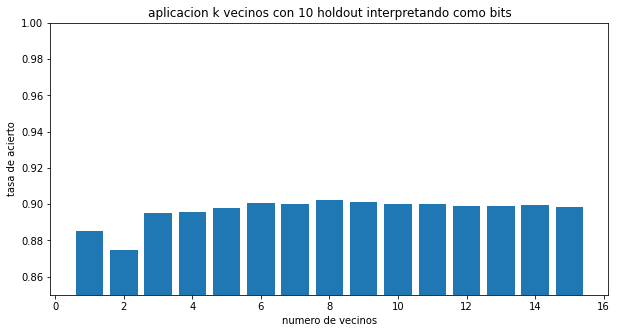

In [110]:
fig,ax=plt.subplots(figsize=(10,5))#creo el diagrama con tamano 10,5
ax.bar(x=np.arange(1,16),height=aciertosBits)#en eje x recorro de 1 a 16 y de altura pongo lo de aciertos
ax.set_title("aplicacion k vecinos con 10 holdout interpretando como bits")
ax.set_ylim(0.85,1)#limito entre 0,85 y 1 lo que se muestra
ax.set_xlabel("numero de vecinos")
ax.set_ylabel("tasa de acierto")

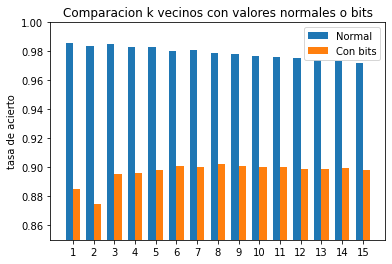

In [111]:
#selecciono los datos
ejeX = np.arange(1,16)
normal = aciertos
bits = aciertosBits


x = np.arange(len(ejeX))#valores del eje x, cuantos son

width = 0.35#tamano de cada barra

fig, ax = plt.subplots()#creo el grafico


rects1 = ax.bar(x - width/2, normal, width, label='Normal')#barras del primero, normal
rects2 = ax.bar(x + width/2, bits, width, label='Con bits')#barras del segundo,con bits


ax.set_ylabel('tasa de acierto')#etiquetas
ax.set_title('Comparacion k vecinos con valores normales o bits')
ax.set_ylim(0.85,1)#limito entre 0,85 y 1 lo que se muestra
ax.set_xticks(x)#asigno etiquetas
ax.set_xticklabels(ejeX)

ax.legend()#pongo leyenda




plt.show()